<a href="https://colab.research.google.com/github/sanjithVprabhu/machine_learning/blob/main/ptorc_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Lets begin writing some code")

Lets begin writing some code


In [3]:
!nvidia_smi

/bin/bash: line 1: nvidia_smi: command not found


In [41]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu124


In [9]:
##Introduction To Tensors

In [11]:
scalar = torch.tensor(7)
scalar

tensor(7)

tensor(7)

In [12]:
scalar.ndim

0

In [13]:
scalar.item()

7

In [14]:
#Vector

In [15]:
vector = torch.tensor([7,7])

In [16]:
vector

tensor([7, 7])

In [17]:
vector.ndim

1

In [18]:
vector.shape

torch.Size([2])

In [19]:
#matrix

In [20]:
MATRIX = torch.tensor([[7,8],[3,4]])

In [21]:
MATRIX.ndim

2

In [22]:
MATRIX.shape

torch.Size([2, 2])

In [23]:
TENSOR = torch.tensor([[[1,2,3],[3,6,9],[7,8,9]]])

In [24]:
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [7, 8, 9]]])

In [27]:
TENSOR.ndim


3

In [26]:
TENSOR.shape

torch.Size([1, 3, 3])

In [28]:
random_tensor = torch.rand(4,5,6)

In [31]:
random_image = torch.rand(size=(224,224,3))

##Zeroes and Ones


In [33]:
zeros = torch.zeros(size=(3,4))

In [34]:
ones = torch.ones(3,4)

In [35]:
ones.dtype

torch.float32

#use torch.range()

In [38]:
torch_range = torch.arange(0,10)
print(torch_range)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [3]:
torch.rand(3,3)

tensor([[0.6770, 0.0449, 0.9353],
        [0.0171, 0.4888, 0.2734],
        [0.0605, 0.3205, 0.5334]])

In [5]:
random_tensor_B = torch.rand(3,4)
random_tensor_A = torch.rand(3,4)
print(random_tensor_A)
print(random_tensor_B)

tensor([[0.1783, 0.5409, 0.6029, 0.9384],
        [0.3029, 0.6336, 0.6165, 0.6696],
        [0.1070, 0.9377, 0.0810, 0.8153]])
tensor([[0.9544, 0.3887, 0.6831, 0.7906],
        [0.2308, 0.3108, 0.1225, 0.0973],
        [0.0108, 0.3383, 0.7085, 0.9434]])


In [42]:
import torch
RANDOM_SEED =42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)

random_tensor_D = torch.rand(3,4)
print(random_tensor_C)
print(random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])


In [11]:
!nividia-smi

/bin/bash: line 1: nividia-smi: command not found


In [43]:
import torch
from torch import nn #nn contains all of pytorchs building blocks
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cu124'

Data Preparation


In [44]:

weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
len(X),len(y)

(50, 50)

In [45]:
X_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(y))]
X_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(y)):]
len(X_train),len(y_train),len(X_test),len(y_test)

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})



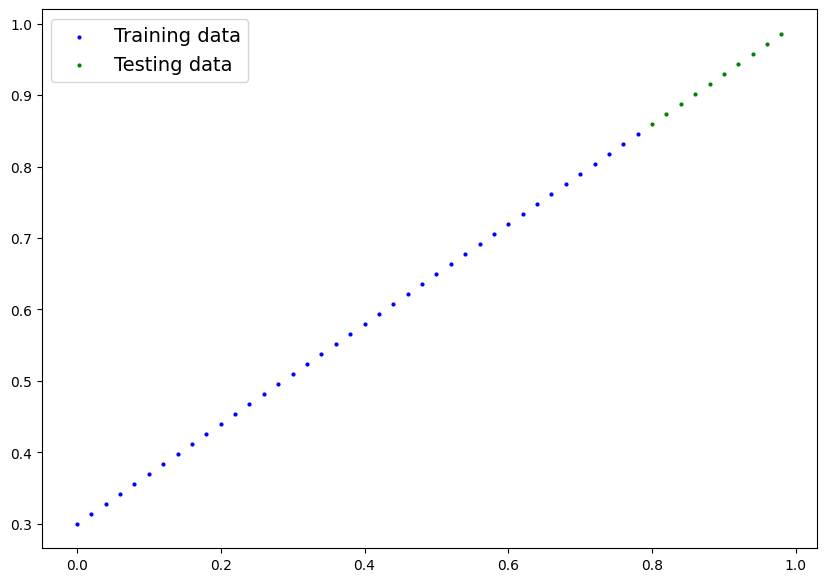

In [46]:
plot_predictions();

## Build Model


torch.nn - consists of all the modules in the neural network
torch.nn.parameter - parameters of your module
torch.nn.module - base class for all nns
torch.optim - optimising function
torch.utils.data.Dataset - map between key and sample pairs of your data
torch.util.data.Dataloader - creates

In [47]:
#Create a linear regression model class
class LinearRegressionModel(nn.Module):#almost everything in pytorhc inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [48]:
torch.manual_seed(42)
model = LinearRegressionModel()
list(model.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [49]:
# List named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

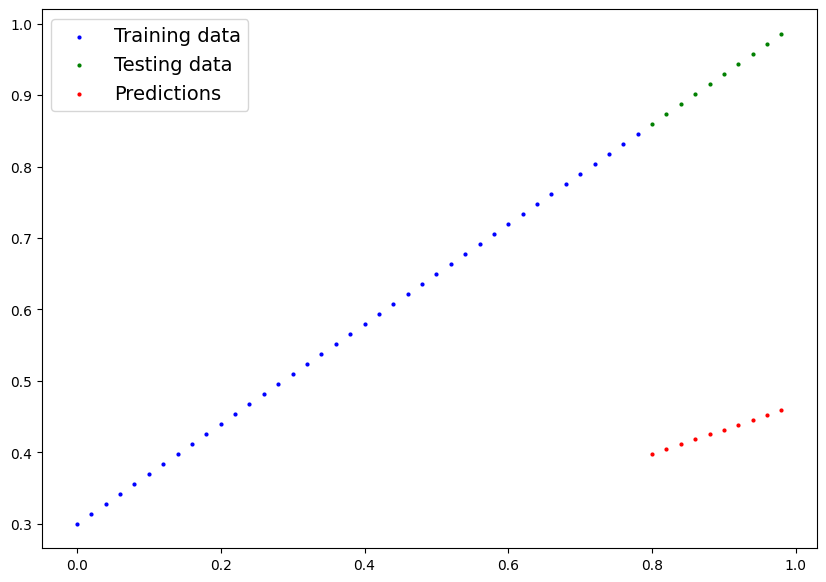

In [50]:
with torch.inference_mode():
  y_preds = model(X_test)
plot_predictions(predictions=y_preds)


In [51]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [52]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [54]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [71]:
epochs = 10000
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 10 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 20 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 30 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 40 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 50 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 60 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 70 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 80 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 90 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 100 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 110 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 120 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 130 | Loss: 0.008932482451200485 | Test lo

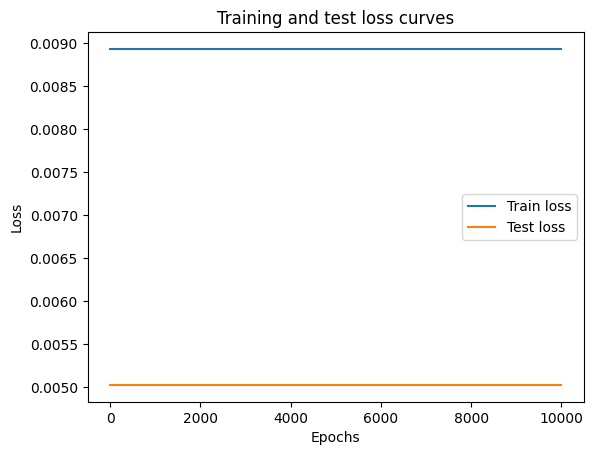

In [72]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [69]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [68]:
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

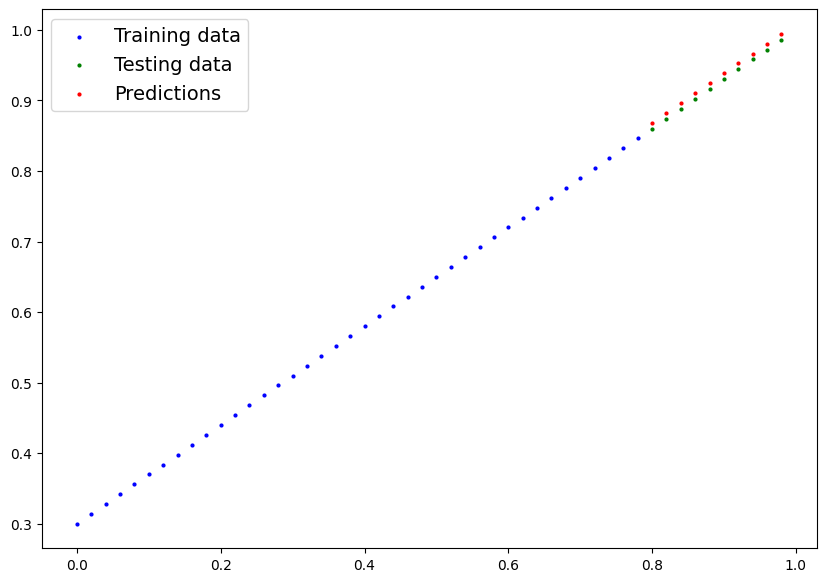

In [70]:
plot_predictions(predictions=y_preds)

In [73]:
torch.save()

TypeError: save() missing 2 required positional arguments: 'obj' and 'f'

In [74]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')